In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("data"))

# Any results you write to the current directory are saved as output.

['NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS', 'NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS.tar', 'NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC', 'NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC.tar', 'NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC.tar.gz', 'NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV', 'NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar', 'NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar.gz']


In [9]:
df = pd.read_excel('data/NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS/nips4b_birdchallenge_train_labels.xls', skiprows=1)
df.fillna(0, inplace=True)
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,class name >,Aegcau_call,Alaarv_song,Anttri_song,Butbut_call,Carcan_call,Carcan_song,...,Sylmel_song,Sylund_call,Sylund_song,Tetpyg_song,Tibtom_song,Trotro_song,Turmer_call,Turmer_song,Turphi_call,Turphi_song
0,Filename,card_species,Empty,class number >,1.0,2.0,3.0,4.0,5.0,6.0,...,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0
1,nips4b_birds_trainfile001.wav,3,0,-,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nips4b_birds_trainfile002.wav,1,0,-,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,nips4b_birds_trainfile003.wav,2,0,-,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,nips4b_birds_trainfile004.wav,3,0,-,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,nips4b_birds_trainfile005.wav,3,0,-,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,nips4b_birds_trainfile006.wav,2,0,-,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,nips4b_birds_trainfile007.wav,5,0,-,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,nips4b_birds_trainfile008.wav,1,0,-,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,nips4b_birds_trainfile009.wav,0,1,-,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
classes = ['Aegcau_call',
       'Alaarv_song', 'Anttri_song', 'Butbut_call', 'Carcan_call',
       'Carcan_song', 'Carcar_call', 'Carcar_song', 'Cerbra_call',
       'Cerbra_song', 'Cetcet_song', 'Chlchl_call', 'Cicatr_song',
       'Cicorn_song', 'Cisjun_song', 'Colpal_song', 'Corcor_call',
       'Denmaj_call', 'Denmaj_drum', 'Embcir_call', 'Embcir_song',
       'Erirub_call', 'Erirub_song', 'Fricoe_call', 'Fricoe_song',
       'Galcri_call', 'Galcri_song', 'Galthe_call', 'Galthe_song',
       'Gargla_call', 'Hirrus_call', 'Jyntor_song', 'Lopcri_call',
       'Loxcur_call', 'Lularb_song', 'Lusmeg_call', 'Lusmeg_song',
       'Lyrple_song', 'Motcin_call', 'Musstr_call', 'Oriori_call',
       'Oriori_song', 'Parate_call', 'Parate_song', 'Parcae_call',
       'Parcae_song', 'Parmaj_call', 'Parmaj_song', 'Pasdom_call',
       'Pelgra_call', 'Petpet_call', 'Petpet_song', 'Phofem_song',
       'Phycol_call', 'Phycol_song', 'Picpic_call', 'Plaaff_song',
       'Plasab_song', 'Poepal_call', 'Poepal_song', 'Prumod_song',
       'Ptehey_song', 'Pyrpyr_call', 'Regign_call', 'Regign_song',
       'Serser_call', 'Serser_song', 'Siteur_call', 'Siteur_song',
       'Strdec_song', 'Strtur_song', 'Stuvul_call', 'Sylatr_call',
       'Sylatr_song', 'Sylcan_call', 'Sylcan_song', 'Sylmel_call',
       'Sylmel_song', 'Sylund_call', 'Sylund_song', 'Tetpyg_song',
       'Tibtom_song', 'Trotro_song', 'Turmer_call', 'Turmer_song',
       'Turphi_call', 'Turphi_song']

In [12]:
target = df[classes].values[1:-1, :].argmax(axis=1)
keys = df[df.columns[0]].str.replace('.wav', '').values[1:-1]
labels = {k: classes[v] for k, v in zip(keys, target)}

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
data_dir = Path('data')
wav_dir = data_dir/'NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV'
spect_dir = Path('./spectrograms')
spect_dir.mkdir(parents=True, exist_ok=True)

In [ ]:
import librosa
import librosa.display

def create_spectrogram(fn_audio, fn_gram, zoom=1):
    clip, sample_rate = librosa.load(fn_audio, sr=None)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    fig = plt.figure(figsize=tuple(reversed(S.shape)), dpi=1)
    plt.gca().set_axis_off()
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    fig.savefig(fn_gram, dpi=zoom, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# SPECTROGRAMS

In [ ]:
from IPython.display import Image, Audio, display

# NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV/train/nips4b_birds_trainfile301.wav
create_spectrogram(wav_dir/'train/nips4b_birds_trainfile015.wav', 'tmp/015.png', 2)
plt.imshow(plt.imread('tmp/015.png'))
plt.show()
display(Audio(str(wav_dir/'train/nips4b_birds_trainfile015.wav')))

In [ ]:
from fastprogress import progress_bar

def audios_to_spectrograms(from_path, to_path, folder="", from_suffix=".wav", to_suffix=".png", zoom=1, is_test=False):
    (to_path/folder).mkdir(parents=True, exist_ok=True)
    fns = list((from_path/folder).glob('*' + from_suffix))
    pb = progress_bar(range(len(fns)))
    for i, src in zip(pb, fns):
        dest = to_path/folder/labels[src.stem] if not is_test else to_path/folder
        dest.mkdir(parents=True, exist_ok=True)
        create_spectrogram(src, dest/(src.stem + to_suffix), zoom)
        pb.comment = src.stem

In [ ]:
audios_to_spectrograms(wav_dir, spect_dir, 'test', zoom=2, is_test=True)

In [ ]:
for ds in ('train', 'test'):
    audios_to_spectrograms(wav_dir, spect_dir, ds, zoom=2, is_test=(ds=='test'))

In [ ]:
import random

for ds in ('train', 'test'):
    for fn in random.choices(list((spect_dir/ds).glob('*.png')), k=3):
        print(fn.stem)
        display(Image(str(fn)))
        display(Audio(str(wav_dir/ds/(fn.stem + '.wav'))))

# FASTAI

In [14]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [17]:
get_transforms??

In [18]:
tfms = get_transforms(do_flip=False, flip_vert=False, max_zoom=0., max_warp=0., max_rotate=0., p_affine=0., p_lighting=0.)

In [19]:
test = ImageList.from_folder(spect_dir/'test', extensions=['.png'])

In [20]:
path_img = spect_dir/'train'
fnames = get_image_files(path_img)

In [21]:
np.random.seed(42)

src = (ImageList.from_folder(spect_dir/'train', extensions=['.png'])
       .split_by_rand_pct()
      .label_from_folder())

In [25]:
size = 128 # (193, 669)
bs = 8
data = (src.add_test(test)
        .transform(tfms, size=size)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [26]:
print(data.classes)
len(data.classes),data.c

['Aegcau_call', 'Alaarv_song', 'Anttri_song', 'Butbut_call', 'Carcan_call', 'Carcan_song', 'Carcar_call', 'Carcar_song', 'Cerbra_call', 'Cerbra_song', 'Cetcet_song', 'Chlchl_call', 'Cicatr_song', 'Cicorn_song', 'Cisjun_song', 'Colpal_song', 'Corcor_call', 'Denmaj_call', 'Denmaj_drum', 'Embcir_call', 'Embcir_song', 'Erirub_call', 'Erirub_song', 'Fricoe_call', 'Fricoe_song', 'Galcri_call', 'Galcri_song', 'Galthe_call', 'Galthe_song', 'Gargla_call', 'Hirrus_call', 'Jyntor_song', 'Lopcri_call', 'Loxcur_call', 'Lularb_song', 'Lusmeg_call', 'Lusmeg_song', 'Lyrple_song', 'Motcin_call', 'Musstr_call', 'Oriori_call', 'Oriori_song', 'Parate_call', 'Parate_song', 'Parcae_call', 'Parcae_song', 'Parmaj_call', 'Parmaj_song', 'Pasdom_call', 'Pelgra_call', 'Petpet_call', 'Petpet_song', 'Phofem_song', 'Phycol_call', 'Picpic_call', 'Plaaff_song', 'Plasab_song', 'Poepal_song', 'Prumod_song', 'Ptehey_song', 'Pyrpyr_call', 'Regign_song', 'Serser_call', 'Siteur_call', 'Strtur_song', 'Stuvul_call', 'Sylatr_c

(77, 77)

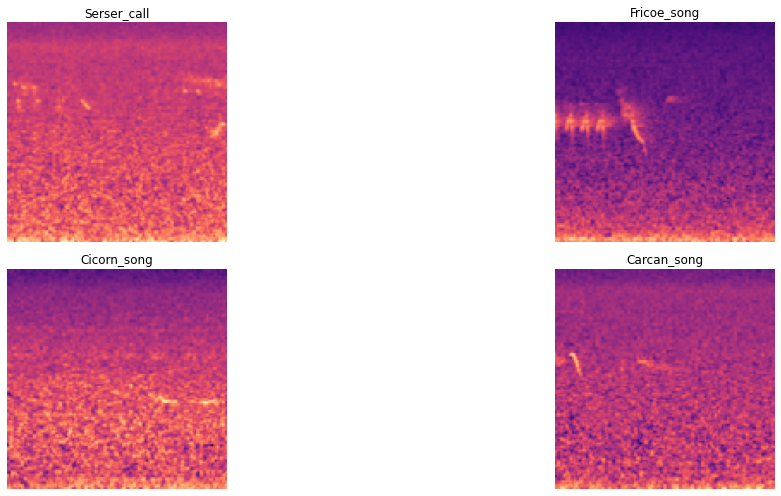

In [27]:
data.show_batch(2, figsize=(20,7))

In [30]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy]).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


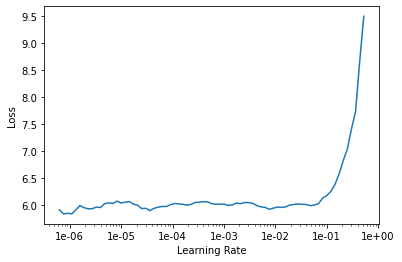

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
lr=3e-3

In [ ]:
learn.data.train_dl.num_workers = 0
learn.data.test_dl.num_workers = 0

In [33]:
learn.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,accuracy,time
0,5.423964,4.238997,0.175182,02:43
1,4.897186,4.277340,0.153285,03:00
2,4.317997,3.710181,0.233577,02:39
3,3.701252,3.640710,0.189781,02:39


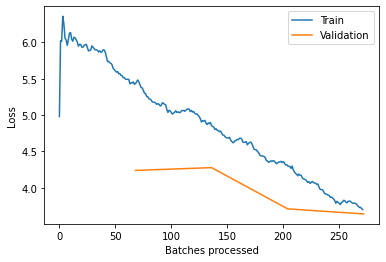

In [34]:
learn.recorder.plot_losses()

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

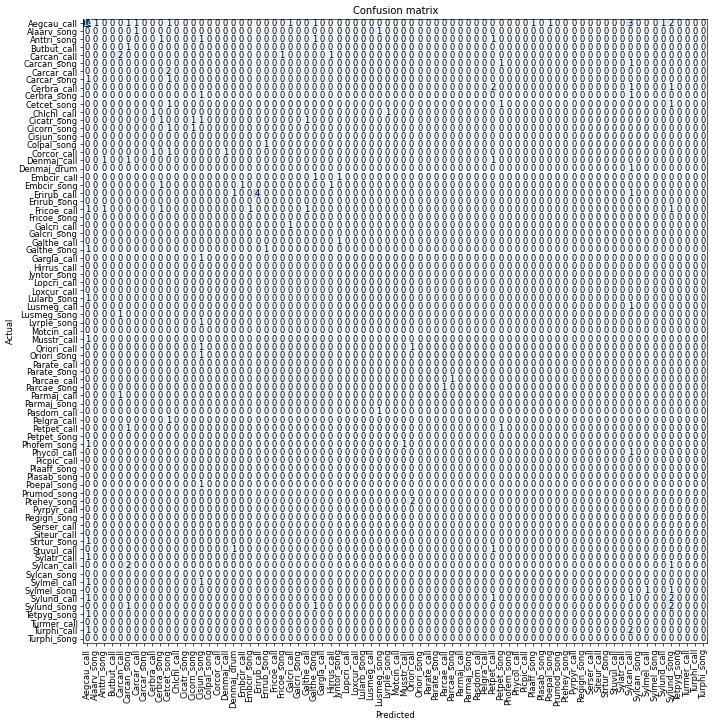

In [36]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [37]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1')

In [47]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


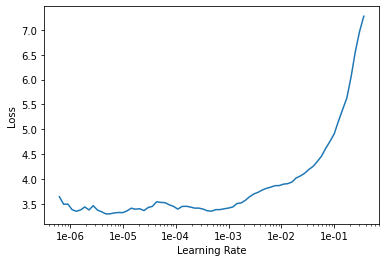

In [39]:
learn.lr_find()
learn.recorder.plot()

In [48]:
lrs = slice(3e-6, lr/10)

In [49]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,accuracy,time
0,3.529968,3.552115,0.204380,01:55
1,3.216225,3.429364,0.233577,01:43
2,2.969301,3.435454,0.299270,01:42
3,2.628354,3.485486,0.233577,01:46
4,2.235254,3.368706,0.248175,01:46
5,1.874989,3.317764,0.277372,01:42
6,1.558805,3.291548,0.262774,01:46
7,1.319462,3.260316,0.277372,02:01
8,1.186517,3.176594,0.284672,01:54
9,1.107248,3.261535,0.270073,01:48


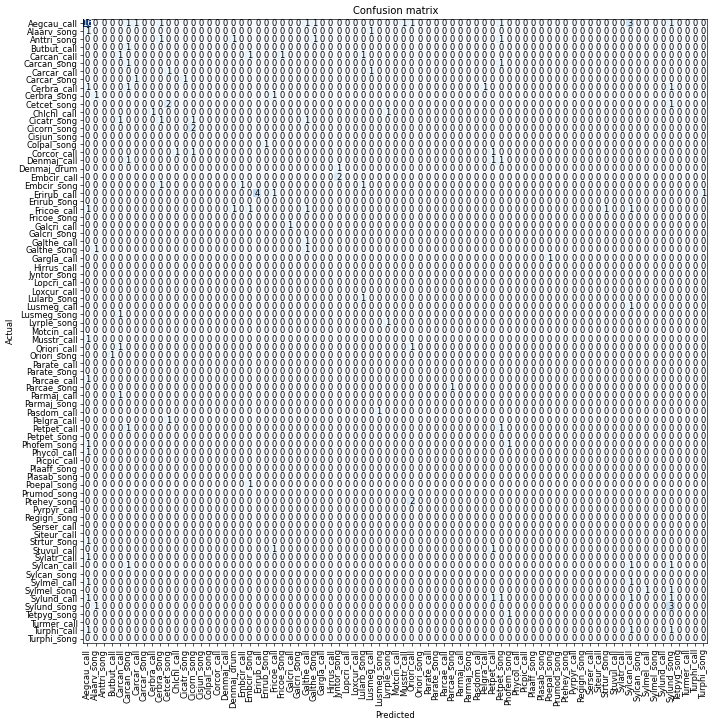

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [52]:
learn.save('stage-2')